In [102]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

dtypes = {'id': 'int32', 
'titulo': 'object', 
'descripcion': 'object', 
'tipodepropiedad': 'category', 
'direccion': 'object', 
'ciudad': 'object', 
'provincia': 'category', 
'antiguedad': 'float16', 
'habitaciones': 'float16', 
'garages': 'float16', 
'banos': 'float16', 
'metroscubiertos': 'float16', 
'metrostotales': 'float16', 
'idzona': 'object', 
'lat': 'float64', 
'lng': 'float64', 
'gimnasio': 'float16', 
'usosmultiples': 'float16', 
'piscina': 'float16', 
'escuelascercanas': 'float16', 
'centroscomercialescercanos': 'float16', 
'precio': 'float32', }
#parse_dates = ['fecha'] CONSUME MAS MEMORIA QUE EL TIPO OBJECT. Conviene convertirlo luego de subido el csv.


train = pd.read_csv('C:/Users/24380293303/Desktop/train.csv', dtype = dtypes, low_memory=False, error_bad_lines = False)


In [5]:
#Chequeamos si hay valores nulos para ver si es relevante hacer el analisis
train.isnull().any()

id                            False
titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
dtype: bool

In [6]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(train), 2)
nulls

,nulls,porcentaje
id,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
precio,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06


In [88]:
train.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

Text(0.5, 1.0, 'Cantidad de propiedades por provincia')

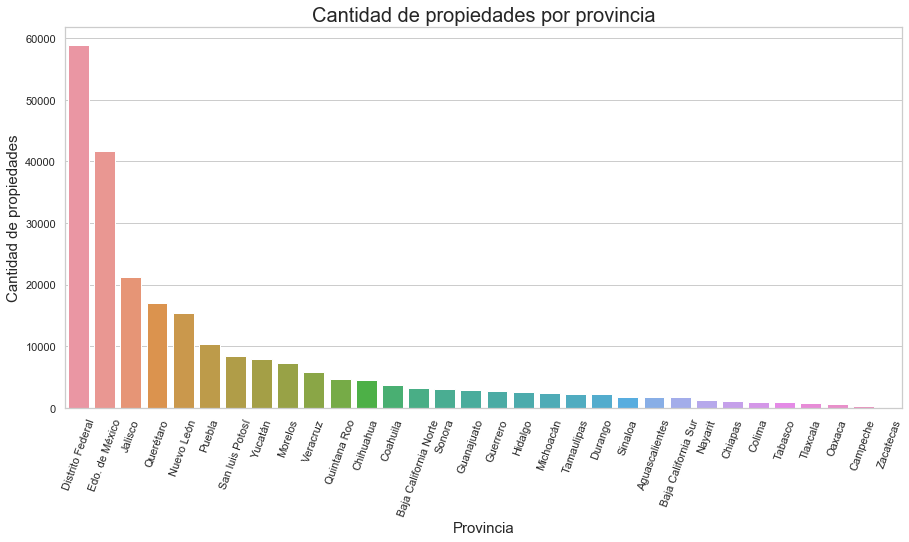

In [19]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train, order=train['provincia'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades por provincia", fontsize=20)

In [57]:
# Muestra cada provincia con su correspondiente promedio de precio ordenados de mayor a menor
train_precio_prov = train_prov[['provincia', 'precio']].sort_values(by='precio', ascending=False)
train_precio_prov = train_precio_prov.rename(columns={'precio':'precio_promedio'})
train_precio_prov['precio_promedio_usd'] = train_precio_prov['precio_promedio'] * 0.051
train_precio_prov


,provincia,precio_promedio,precio_promedio_usd
8,Distrito Federal,"3,471,705.00","177,056.95"
10,Edo. de México,"2,762,465.00","140,885.72"
18,Nuevo León,"2,717,757.75","138,605.64"
12,Guerrero,"2,548,741.75","129,985.83"
22,Quintana Roo,"2,402,967.00","122,551.31"
14,Jalisco,"2,367,693.50","120,752.37"
26,Tabasco,"2,300,480.25","117,324.49"
20,Puebla,"2,298,403.75","117,218.59"
16,Morelos,"2,290,088.00","116,794.48"
21,Querétaro,"2,144,109.00","109,349.55"


Text(0, 0.5, 'Nombre de la provincia')

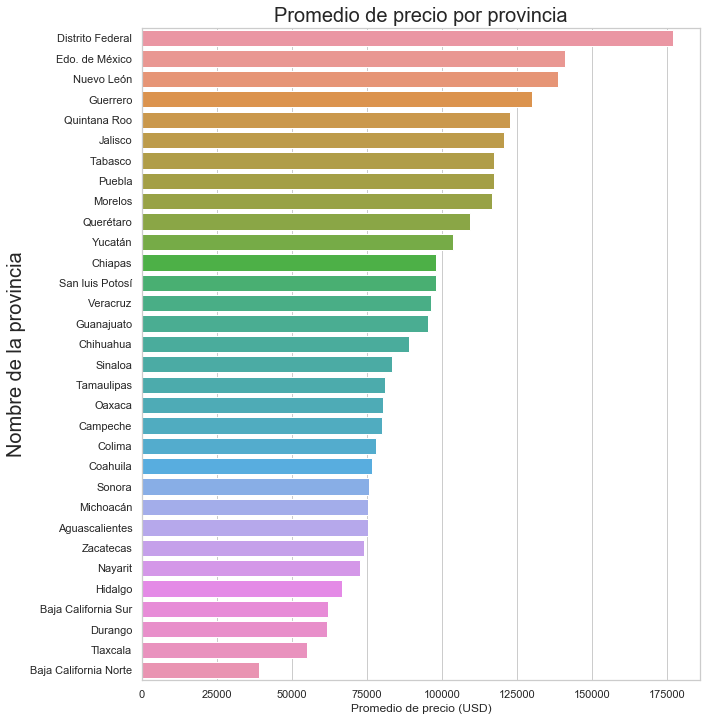

In [85]:
#Grafico de promedio de precio por provincia
plt.rcParams['figure.figsize'] = (10, 12)
g = sns.barplot(x= train_precio_prov['precio_promedio_usd'], y=train_prop_prov['provincia'], orient='h', order = train_precio_prov.iloc[:, 0])
g.set_title("Promedio de precio por provincia", fontsize=20)
g.set_xlabel("Promedio de precio (USD)", fontsize=12)
g.set_ylabel("Nombre de la provincia", fontsize=20)


In [58]:
train['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

Text(0.5, 1.0, 'Cantidad de propiedades por tipo')

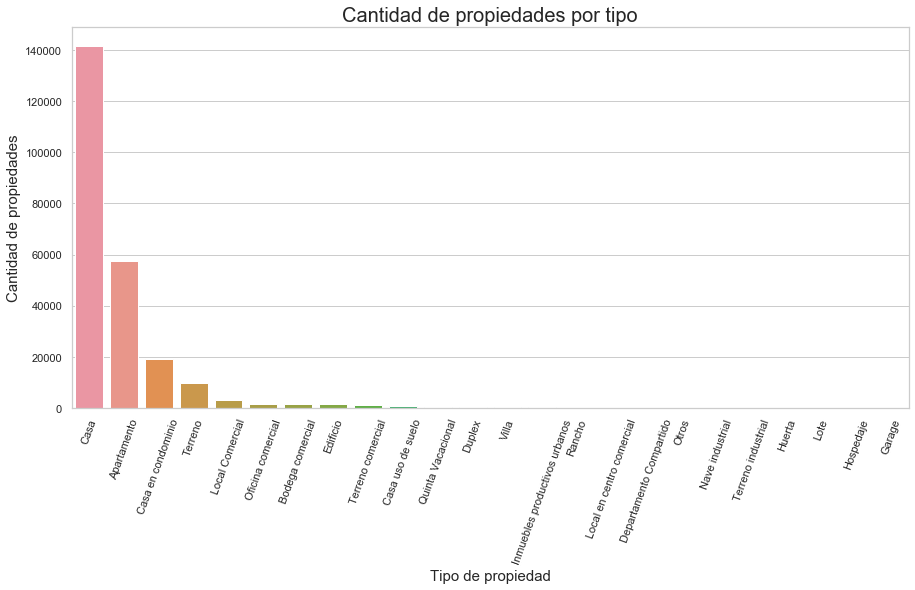

In [60]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='tipodepropiedad', data=train, order=train['tipodepropiedad'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Tipo de propiedad", fontsize=15)
g.set_ylabel("Cantidad de propiedades", fontsize=15)
g.set_title("Cantidad de propiedades por tipo", fontsize=20)

In [61]:
train_tipoprop_precio = train.groupby('tipodepropiedad').agg({'precio':'mean'})
train_tipoprop_precio = train_tipoprop_precio.reset_index()
train_tipoprop_precio = train_tipoprop_precio[['tipodepropiedad', 'precio']].sort_values(by='precio', ascending=False)
train_tipoprop_precio = train_tipoprop_precio.rename(columns={'precio':'precio_promedio'})
train_tipoprop_precio['precio_promedio_usd'] = train_tipoprop_precio['precio_promedio'] * 0.051
train_tipoprop_precio

,tipodepropiedad,precio_promedio,precio_promedio_usd
7,Edificio,"5,009,499.50","255,484.47"
19,Rancho,"4,032,681.50","205,666.75"
11,Inmuebles productivos urbanos,"3,743,070.00","190,896.56"
15,Nave industrial,"3,742,600.00","190,872.59"
4,Casa uso de suelo,"3,732,469.25","190,355.92"
22,Terreno industrial,"3,647,994.50","186,047.72"
10,Huerta,"3,543,350.00","180,710.84"
18,Quinta Vacacional,"3,187,426.50","162,558.75"
16,Oficina comercial,"3,148,532.75","160,575.17"
9,Hospedaje,"3,000,000.00","153,000.00"


Text(0, 0.5, 'Tipo de propiedad')

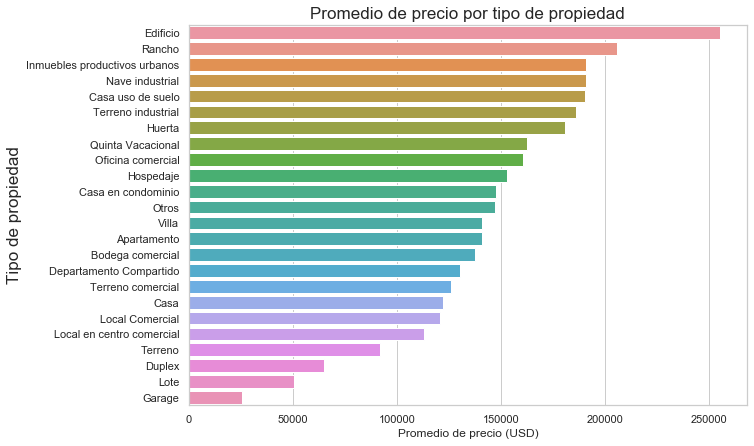

In [62]:
#Grafico de promedio de precio por provincia
plt.rcParams['figure.figsize'] = (10, 7)
g = sns.barplot(x= train_tipoprop_precio['precio_promedio_usd'], y=train_tipoprop_precio['tipodepropiedad'], orient='h', order = train_tipoprop_precio.iloc[:, 0])
g.set_title("Promedio de precio por tipo de propiedad", fontsize=17)
g.set_xlabel("Promedio de precio (USD)", fontsize=12)
g.set_ylabel("Tipo de propiedad", fontsize=17)

In [65]:
train_casa = train.loc[(train['tipodepropiedad'] == 'Casa')]
train_casa['precio_metro_usd'] = (train_casa['precio']/train_casa['metrostotales']) * 0.051
train_casa_prov = train_casa.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_casa_prov.reset_index(inplace = True)
train_casa_prov = train_casa_prov[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_casa_prov.loc[:, ['provincia', 'precio_metro_usd']]

,provincia,precio_metro_usd
8,Distrito Federal,"1,026.26"
10,Edo. de México,699.36
14,Jalisco,661.62
20,Puebla,651.97
18,Nuevo León,642.27
26,Tabasco,638.97
29,Veracruz,571.77
4,Chiapas,563.83
11,Guanajuato,551.44
23,San luis Potosí,550.04


Text(0, 0.5, 'Provincia')

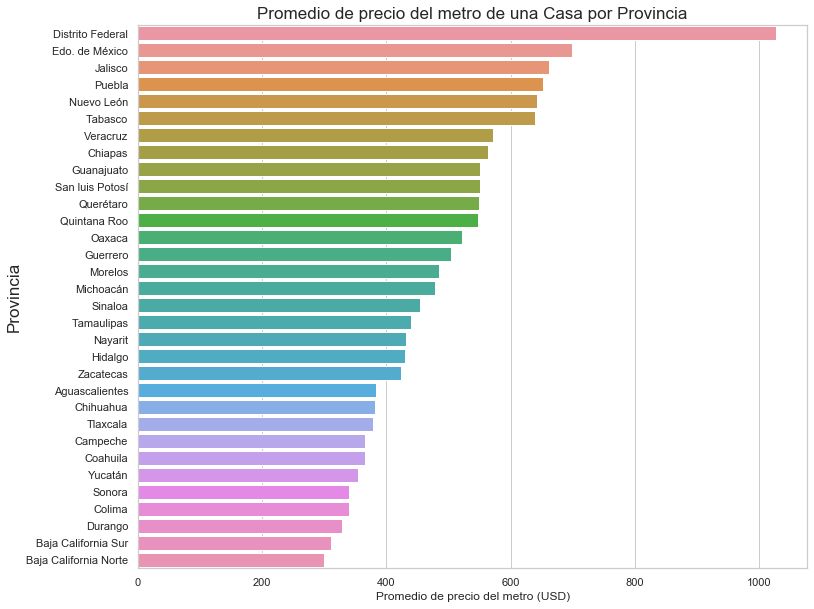

In [67]:
plt.rcParams['figure.figsize'] = (12, 10)
g = sns.barplot(x= train_casa_prov['precio_metro_usd'], y=train_casa_prov['provincia'], orient='h', order = train_casa_prov.iloc[:,0])
g.set_title("Promedio de precio del metro de una Casa por Provincia", fontsize=17)
g.set_xlabel("Promedio de precio del metro (USD)", fontsize=12)
g.set_ylabel("Provincia", fontsize=17)

In [69]:
train_casa.provincia.value_counts()

Edo. de México           25938
Distrito Federal         15812
Jalisco                  14196
Nuevo León               11477
Querétaro                11396
Puebla                    6577
Yucatán                   6472
San luis Potosí           5612
Morelos                   4626
Veracruz                  4445
Chihuahua                 3891
Coahuila                  3329
Baja California Norte     2769
Sonora                    2732
Quintana Roo              2343
Guanajuato                2318
Hidalgo                   2134
Durango                   1995
Michoacán                 1981
Tamaulipas                1822
Baja California Sur       1473
Sinaloa                   1449
Aguascalientes            1340
Nayarit                    978
Chiapas                    903
Colima                     777
Tabasco                    722
Tlaxcala                   716
Guerrero                   578
Oaxaca                     529
Campeche                   210
Zacatecas                   80
Name: pr

Text(0.5, 1.0, 'Cantidad de casas por provincia')

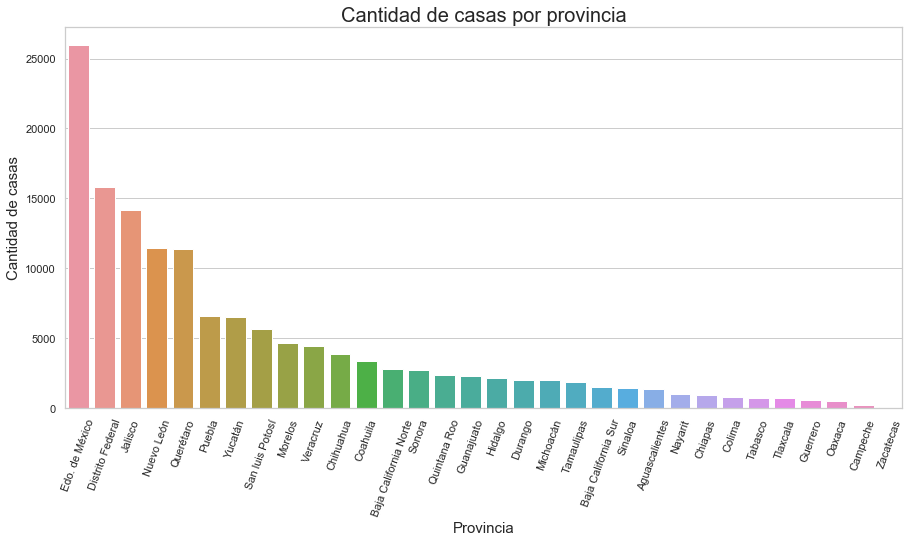

In [72]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_casa, order=train_casa.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de casas", fontsize=15)
g.set_title("Cantidad de casas por provincia", fontsize=20)

In [71]:
train_apartamento = train.loc[(train['tipodepropiedad'] == 'Apartamento')]
train_apartamento_prov = train_apartamento.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_apartamento_prov.reset_index(inplace = True)
train_apartamento_prov = train_apartamento_prov[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_apartamento_prov.loc[:, ['provincia', 'precio_metro_usd']]

,provincia,precio_metro_usd
0,Aguascalientes,"1,929.64"
8,Distrito Federal,"1,349.72"
17,Nayarit,"1,225.15"
18,Nuevo León,"1,191.67"
22,Quintana Roo,"1,065.15"
12,Guerrero,978.70
14,Jalisco,945.23
10,Edo. de México,935.05
2,Baja California Sur,931.46
7,Colima,885.40


Text(0, 0.5, 'Provincia')

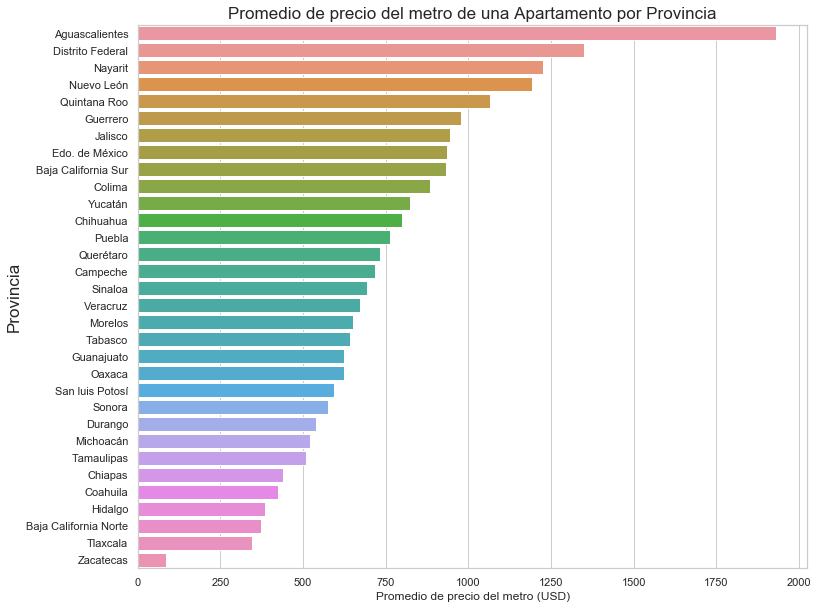

In [75]:
plt.rcParams['figure.figsize'] = (12, 10)
g = sns.barplot(x= train_apartamento_prov['precio_metro_usd'], y=train_apartamento_prov['provincia'], orient='h', order = train_apartamento_prov.iloc[:,0])
g.set_title("Promedio de precio del metro de una Apartamento por Provincia", fontsize=17)
g.set_xlabel("Promedio de precio del metro (USD)", fontsize=12)
g.set_ylabel("Provincia", fontsize=17)

In [76]:
train_apartamento.provincia.value_counts()


Distrito Federal         33839
Edo. de México            8297
Jalisco                   2638
Nuevo León                1847
San luis Potosí           1686
Guerrero                  1586
Puebla                    1522
Quintana Roo              1273
Querétaro                 1084
Morelos                    859
Yucatán                    573
Veracruz                   565
Tamaulipas                 232
Baja California Norte      196
Michoacán                  158
Guanajuato                 148
Nayarit                    107
Tabasco                     97
Sinaloa                     86
Colima                      83
Baja California Sur         82
Chiapas                     52
Hidalgo                     51
Oaxaca                      49
Aguascalientes              47
Chihuahua                   41
Tlaxcala                    31
Durango                     26
Coahuila                    20
Sonora                      17
Campeche                     7
Zacatecas                    1
Name: pr

Text(0.5, 1.0, 'Cantidad de apartamentos por provincia')

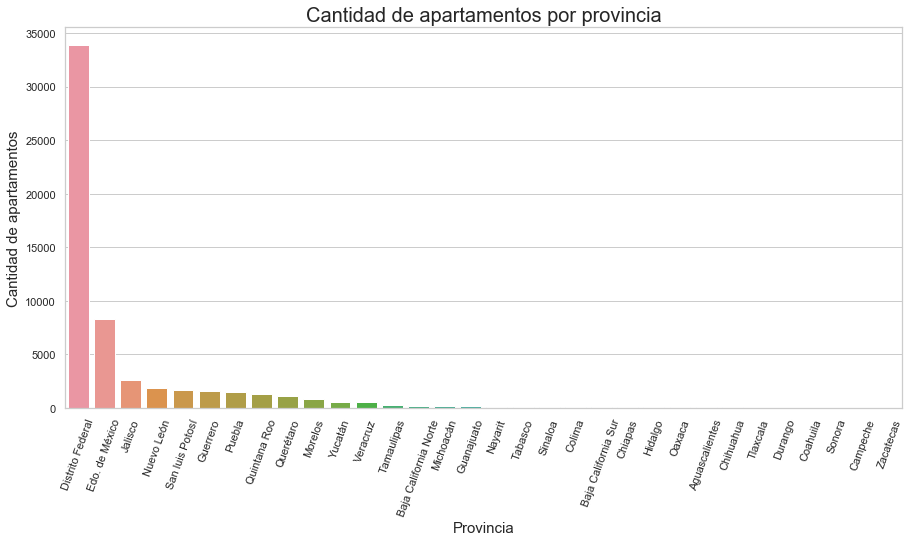

In [77]:
plt.rcParams['figure.figsize'] = (15, 7)
g = sns.countplot(x='provincia', data=train_apartamento, order=train_apartamento.provincia.value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g.set_xlabel("Provincia", fontsize=15)
g.set_ylabel("Cantidad de apartamentos", fontsize=15)
g.set_title("Cantidad de apartamentos por provincia", fontsize=20)


In [147]:
#Desviacion Estandar de precio por provincia
train_provincia_std = train.groupby('provincia').agg({'precio':'std'})
train_provincia_std.reset_index(inplace = True)
train_provincia_std = train_provincia_std[['provincia', 'precio']].sort_values(by='precio', ascending=False)
train_provincia_std = train_provincia_std.rename(columns={'precio':'desviacion_estandar'})
train_provincia_std['desviacion_estandar'] = train_provincia_std['desviacion_estandar'] * 0.051

#Desviacion Estandar de precio de Casa por provincia
train_provincia_std_casa = train.loc[train['tipodepropiedad'] == 'Casa'].groupby('provincia').agg({'precio':'std'})
train_provincia_std_casa.reset_index(inplace = True)
train_provincia_std_casa = train_provincia_std_casa[['provincia', 'precio']].sort_values(by='precio', ascending=False)
train_provincia_std_casa = train_provincia_std_casa.rename(columns={'precio':'desviacion_estandar_casa'})
train_provincia_std_casa['desviacion_estandar_casa'] = train_provincia_std_casa['desviacion_estandar_casa'] * 0.051

#Desviacion Estandar de precio de Apartamento por provincia
train_provincia_std_apart = train.loc[train['tipodepropiedad'] == 'Apartamento'].groupby('provincia').agg({'precio':'std'})
train_provincia_std_apart.reset_index(inplace = True)
train_provincia_std_apart = train_provincia_std_apart[['provincia', 'precio']].sort_values(by='precio', ascending=False)
train_provincia_std_apart = train_provincia_std_apart.rename(columns={'precio':'desviacion_estandar_apart'})
train_provincia_std_apart['desviacion_estandar_apart'] = train_provincia_std_apart['desviacion_estandar_apart'] * 0.051

train_join_provincia_std = pd.merge(train_provincia_std, train_provincia_std_casa, how = 'inner', on='provincia')
train_join_provincia_std = pd.merge(train_join_provincia_std, train_provincia_std_apart, how = 'inner', on='provincia')

train_join_provincia_std.dropna(inplace = True)
train_join_provincia_std

,provincia,desviacion_estandar,desviacion_estandar_casa,desviacion_estandar_apart
0,Distrito Federal,"131,073.20","126,904.95","122,793.98"
1,Nuevo León,"122,132.52","118,632.77","140,945.56"
2,Edo. de México,"119,319.16","117,746.21","126,105.13"
3,Guerrero,"116,732.09","87,023.93","130,856.23"
4,Jalisco,"100,194.63","96,105.62","114,246.05"
5,Puebla,"92,583.76","94,012.45","81,410.95"
7,Quintana Roo,"90,433.59","86,923.11","98,049.67"
8,Tabasco,"88,874.62","84,751.66","87,365.23"
9,Chiapas,"80,276.54","67,359.54","60,772.48"
10,Morelos,"79,743.60","81,443.65","58,781.21"


Text(0.5, 1.0, 'Desviación estándar general vs Casa vs Apartamento por Provincia')

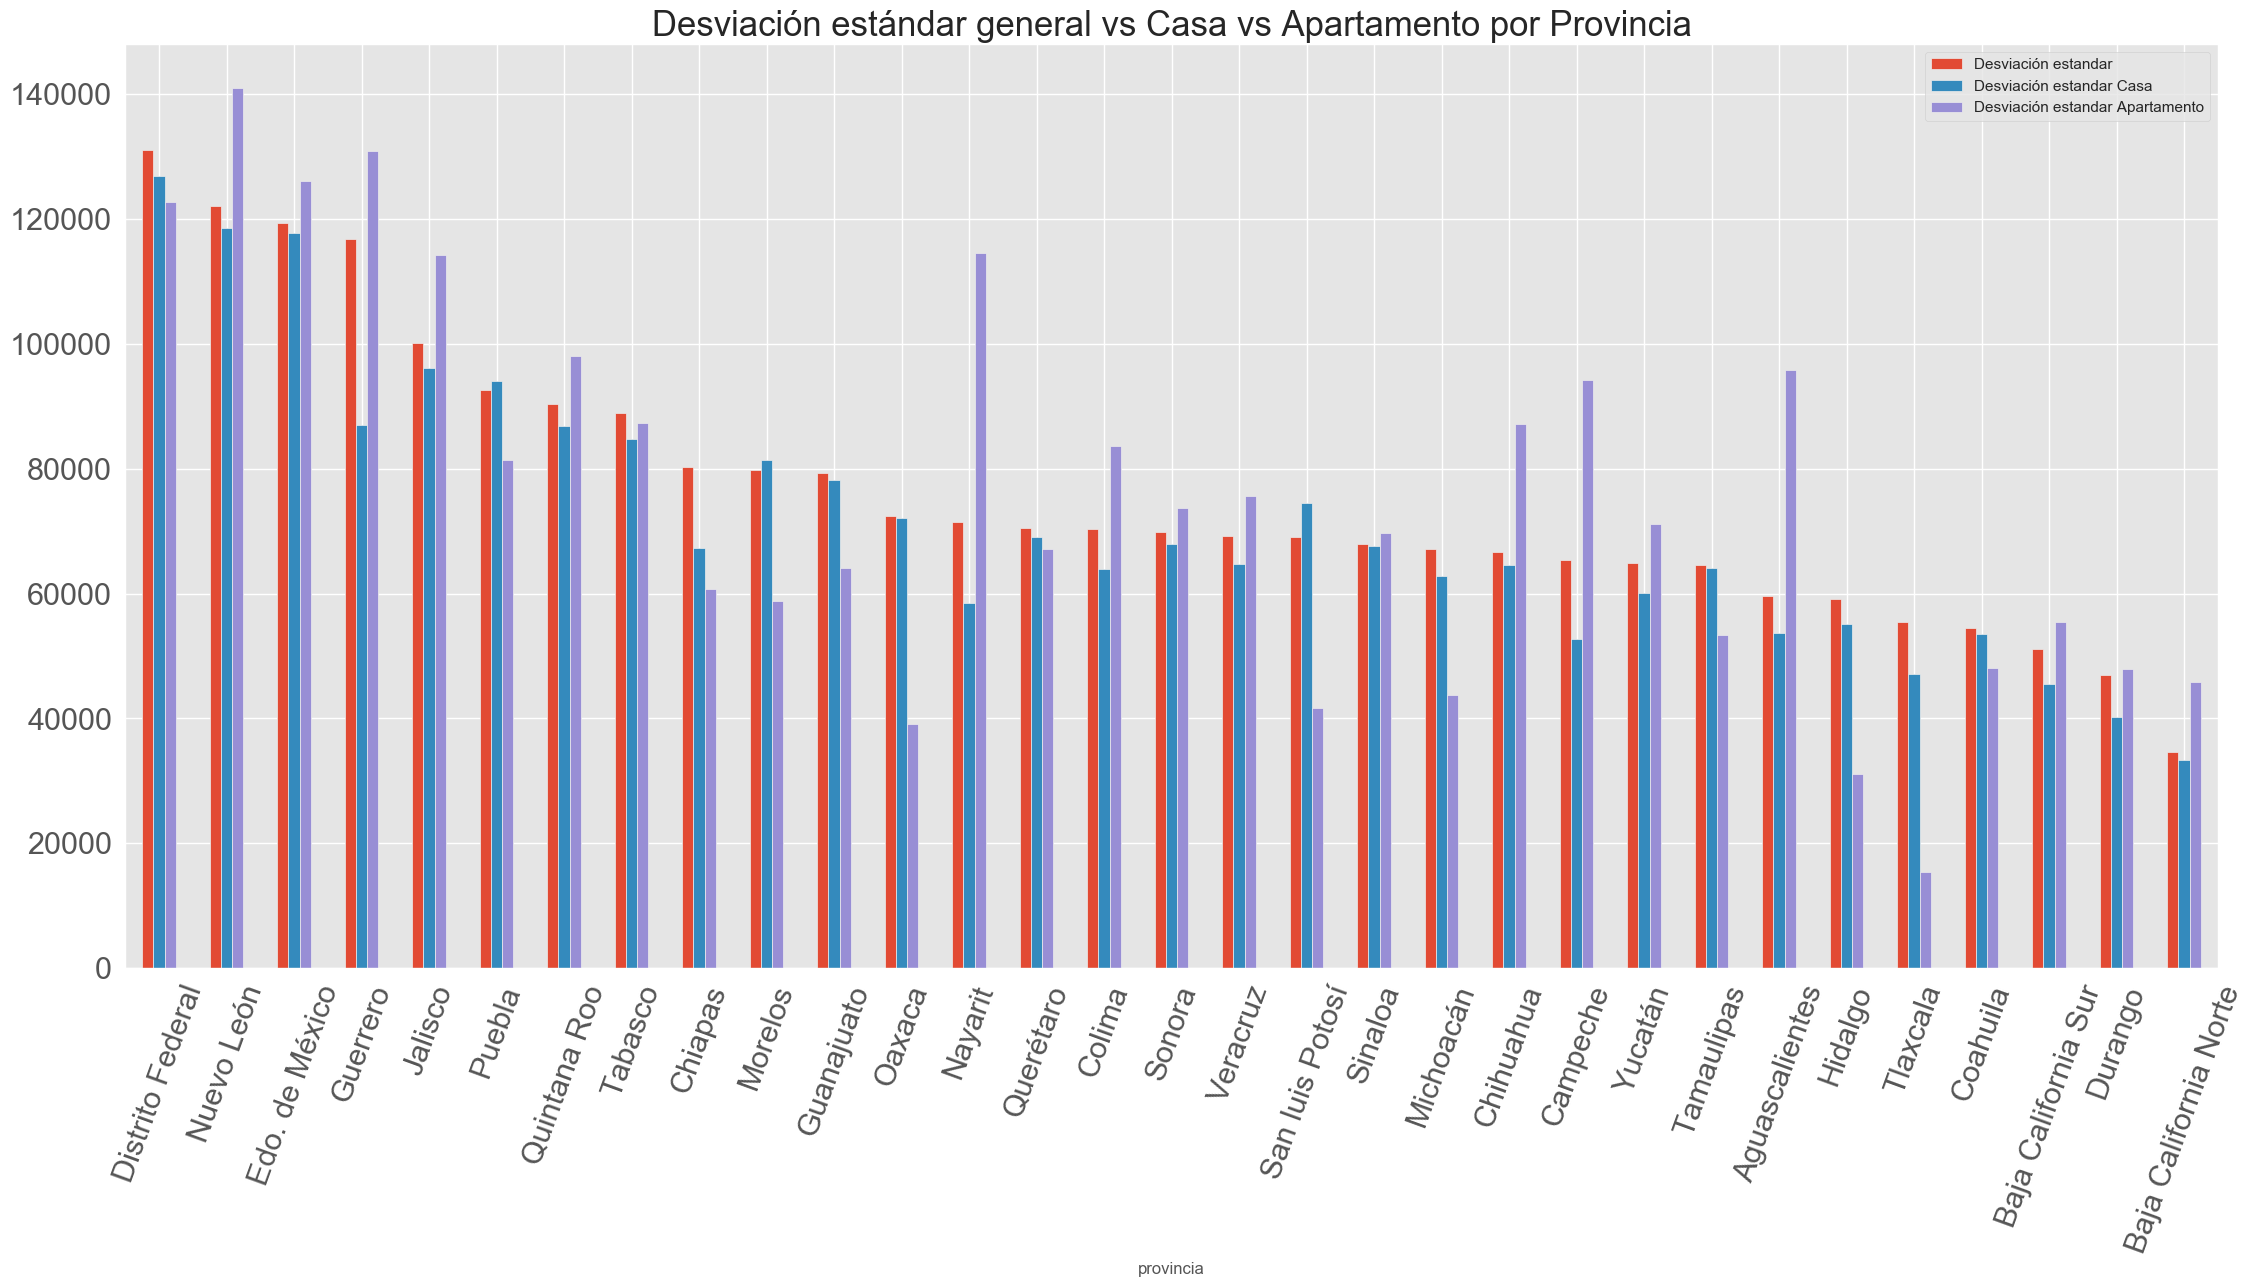

In [148]:
index = train_join_provincia_std['provincia']
std = train_join_provincia_std['desviacion_estandar'].values.tolist()
std_casa = train_join_provincia_std['desviacion_estandar_casa'].values.tolist()
std_apart = train_join_provincia_std['desviacion_estandar_apart'].values.tolist()

df = pd.DataFrame({'Desviación estandar': std,
                   'Desviación estandar Casa': std_casa,
                   'Desviación estandar Apartamento': std_apart}, index=index)

plt.rcParams['figure.figsize'] = (27, 12)
plt.style.use('ggplot')
ax = df.plot.bar(rot=70, fontsize = 22)
ax.set_title('Desviación estándar general vs Casa vs Apartamento por Provincia',fontsize= 25)

In [154]:
train_join_provincia_std['desviacion_estandar_apart'].mean()

75478.5390625